# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 marketing campaigns between May 2008 and November 2010 corresponding to 79,354 contacts with 6,499 successes (8% success rate) where clients subscribed to a long term deposit with the bank.

Narrowing the dataset down to only conclusive instances (successful vs unsuccessful) resulted in 55,817 contacts with the same 6,499 successes

Missing values were then discarded, bringing the dataset to 45,211 instances with 5,289 successes (11.7% success rate)

SVM model performed the best and the most relevant input feature was Call Duration. Other relevant input features were Month of Contact (higher chance of success in the last month of each trimester: March, June, September, December), Nr of Previous Contacts, Days Since Last Contact, Last Contact Result, and First Contact Duration.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/bank-additional-full.csv", sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20378,31,unemployed,single,university.degree,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
7977,43,technician,single,professional.course,no,yes,no,telephone,jun,mon,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
25411,36,technician,single,professional.course,no,yes,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
27909,37,blue-collar,married,basic.6y,no,yes,yes,cellular,mar,thu,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.538,5099.1,no
17835,57,admin.,divorced,high.school,unknown,yes,no,telephone,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
24375,52,management,divorced,university.degree,no,yes,no,cellular,nov,mon,...,2,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
40470,75,retired,married,basic.4y,no,no,no,cellular,aug,wed,...,2,6,3,success,-1.7,94.027,-38.3,0.903,4991.6,yes
39791,29,admin.,married,university.degree,no,no,yes,cellular,jun,tue,...,3,5,1,success,-1.7,94.055,-39.8,0.702,4991.6,yes
16475,48,unknown,married,basic.6y,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
12641,31,admin.,married,basic.9y,no,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.isna().mean().multiply(100).round(2)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [9]:
df.duplicated().sum()

12

In [10]:
# only 12 duplicate rows in our 40,000+ rows dataset, so I think we can safely drop them
df = df.drop_duplicates()
df.shape

(41176, 21)

In [11]:
df['y'].value_counts(normalize = True).round(2)

y
no     0.89
yes    0.11
Name: proportion, dtype: float64

As we can see, the target variable's classes are imbalanced as only 11% subscribed a deposit.

In [12]:
# convert the target variable with no/yes to 0/1
df['y'] = df['y'].replace({'no': 0, 'yes': 1})

In [13]:
# drop duration column since the text above stated it isn't known before a call and should be discarded for a realistic predictive model
df = df.drop(columns = 'duration')

#### Numerical Features

In [14]:
df.describe().round(1)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0
mean,40.0,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0,0.1
std,10.4,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3,0.3
min,17.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6,0.0
25%,32.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1,0.0
50%,38.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0,0.0
75%,47.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1,0.0
max,98.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1,1.0


In [15]:
num_features = df.select_dtypes(['float64', 'int64'])

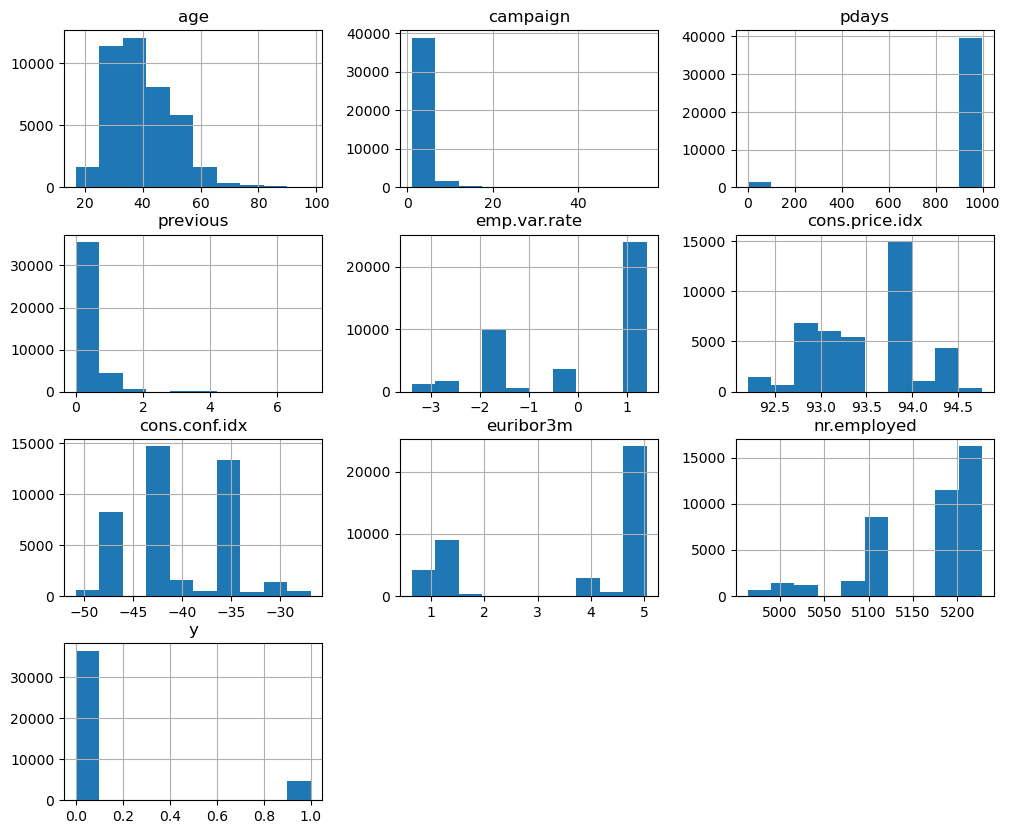

In [16]:
# histograms of numerical features
num_features.hist(figsize = (12, 10));

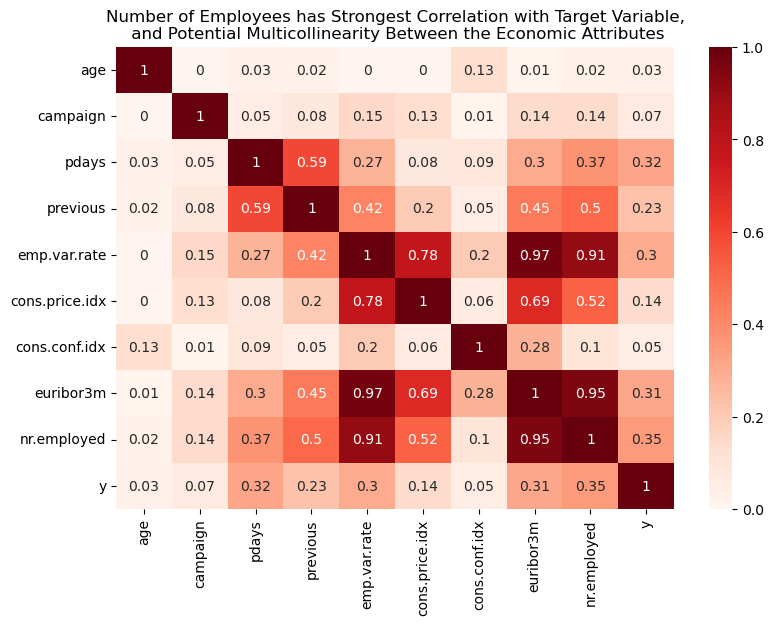

In [17]:
plt.figure(figsize = (9, 6))
sns.heatmap(num_features.corr().abs().round(2), annot = True, cmap = 'Reds')
plt.title('Number of Employees has Strongest Correlation with Target Variable,\n and Potential Multicollinearity Between the Economic Attributes');

The most useful numerical features appear to be:
- nr.employed
- pdays
- euribor3m
- emp.var.rate

There appears to be multicollinearity between nr.employed and euribor3m (0.95 correlation) as well as nr.employed and emp.var.rate (0.91 correlation). We also need to keep in mind that the correlation between pdays and the target variable y is probably skewed because of the 999 values in pdays which is meant to indicate that the client was not previously contacted.

#### Categorical Features

In [18]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


In [19]:
cat_features = df.select_dtypes('object')

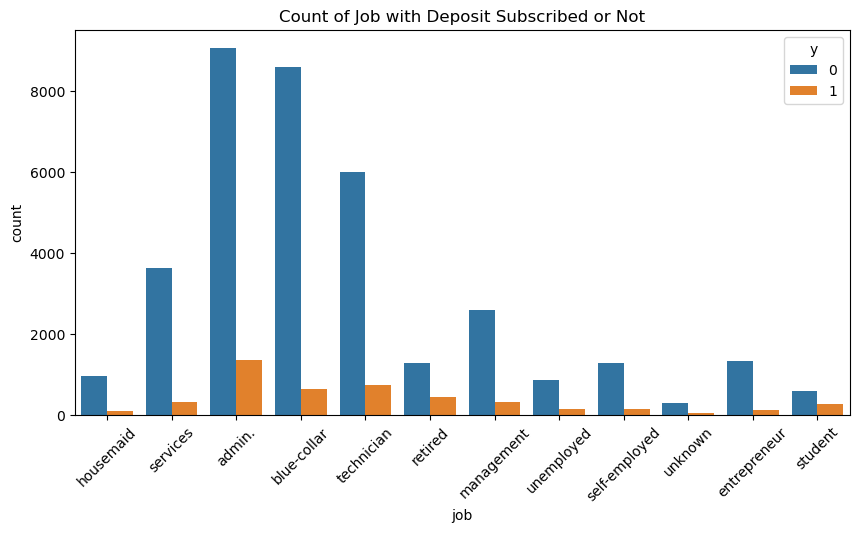

In [20]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'job', hue = 'y')
plt.xticks(rotation = 45)
plt.title('Count of Job with Deposit Subscribed or Not');

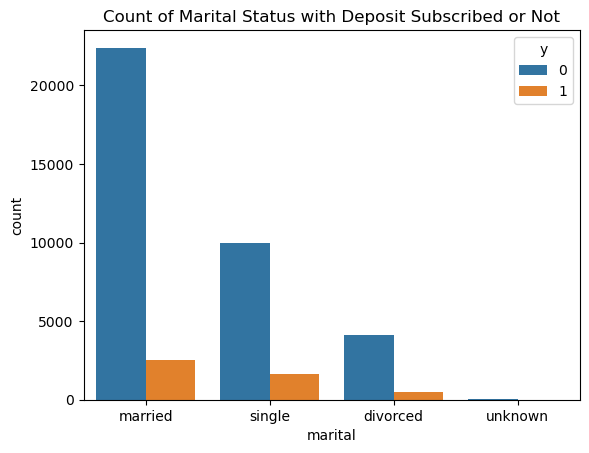

In [21]:
sns.countplot(data = df, x = 'marital', hue = 'y')
plt.title('Count of Marital Status with Deposit Subscribed or Not');

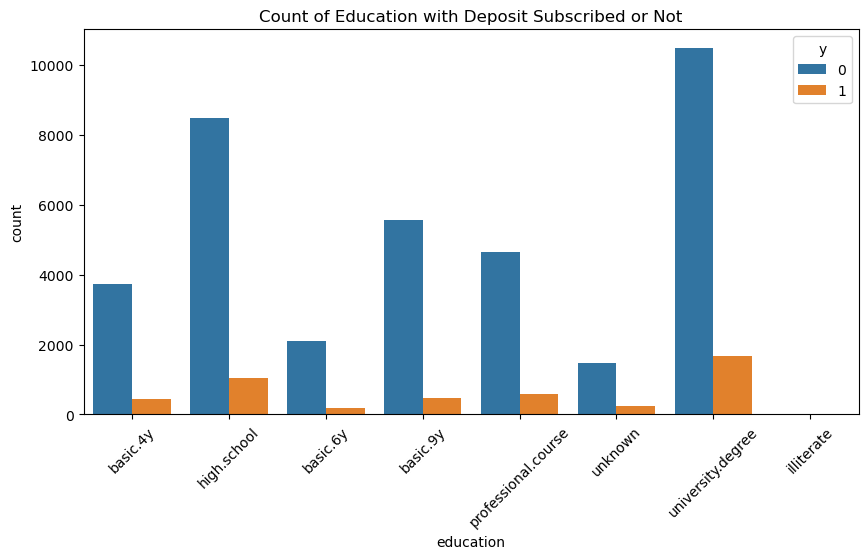

In [22]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'education', hue = 'y')
plt.xticks(rotation = 45)
plt.title('Count of Education with Deposit Subscribed or Not');

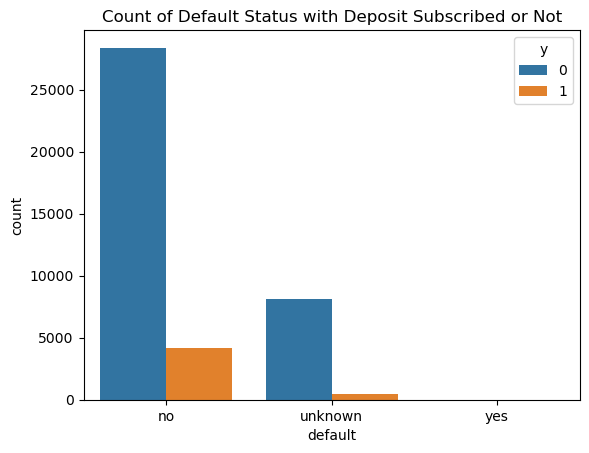

In [23]:
sns.countplot(data = df, x = 'default', hue = 'y')
plt.title('Count of Default Status with Deposit Subscribed or Not');

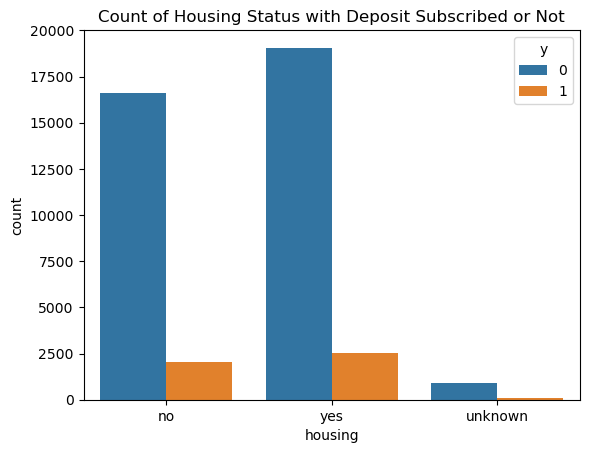

In [24]:
sns.countplot(data = df, x = 'housing', hue = 'y')
plt.title('Count of Housing Status with Deposit Subscribed or Not');

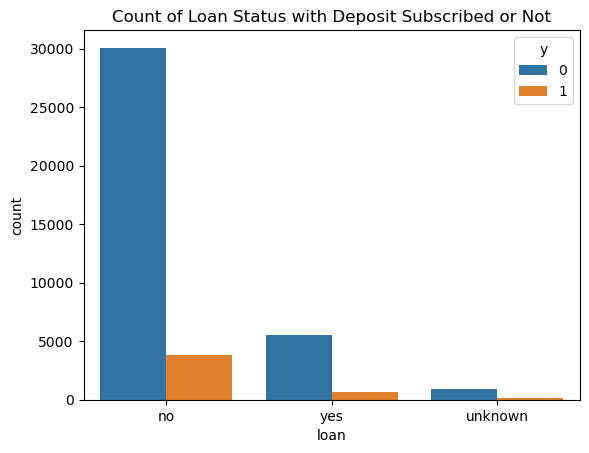

In [25]:
sns.countplot(data = df, x = 'loan', hue = 'y')
plt.title('Count of Loan Status with Deposit Subscribed or Not');

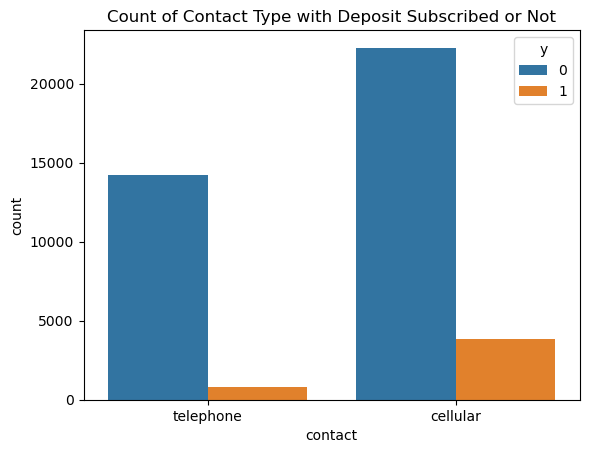

In [26]:
sns.countplot(data = df, x = 'contact', hue = 'y')
plt.title('Count of Contact Type with Deposit Subscribed or Not');

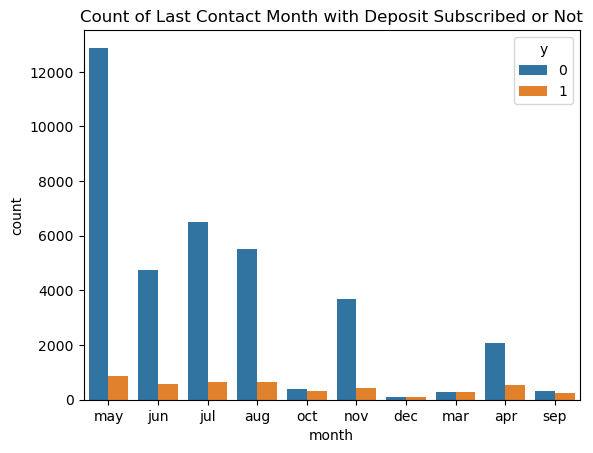

In [27]:
sns.countplot(data = df, x = 'month', hue = 'y')
plt.title('Count of Last Contact Month with Deposit Subscribed or Not');

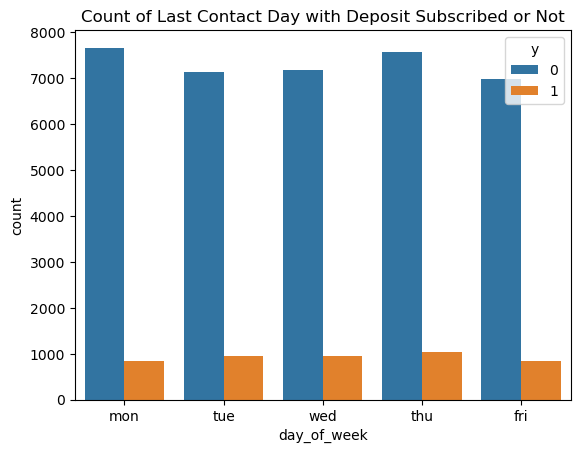

In [28]:
sns.countplot(data = df, x = 'day_of_week', hue = 'y')
plt.title('Count of Last Contact Day with Deposit Subscribed or Not');

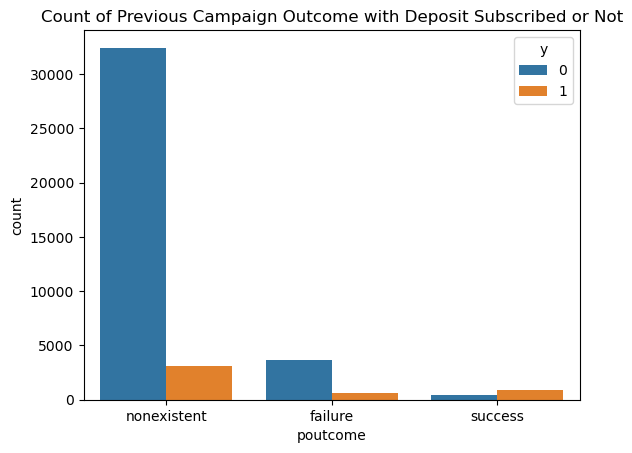

In [29]:
sns.countplot(data = df, x = 'poutcome', hue = 'y')
plt.title('Count of Previous Campaign Outcome with Deposit Subscribed or Not');

In [30]:
df['y'].mean().round(2)

0.11

The overall deposit subscribe rate is 11%, but let's see if certain categorical features deviate from this 11% and will be more useful in our model

In [31]:
df.groupby('job')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
job,,
student,0.31,875
retired,0.25,1718
unemployed,0.14,1014
admin.,0.13,10419
management,0.11,2924
technician,0.11,6739
unknown,0.11,330
housemaid,0.10,1060
self-employed,0.10,1421


In [32]:
df.groupby('marital')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
marital,,
unknown,0.15,80
single,0.14,11564
divorced,0.10,4611
married,0.10,24921


In [33]:
df.groupby('education')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
education,,
illiterate,0.22,18
unknown,0.15,1730
university.degree,0.14,12164
high.school,0.11,9512
professional.course,0.11,5240
basic.4y,0.10,4176
basic.6y,0.08,2291
basic.9y,0.08,6045


Illiterate at 22% success rate, but there were only 18 rows which probably isn't enough data to be confident in that percentage.

In [34]:
df.groupby('default')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
default,,
no,0.13,32577
unknown,0.05,8596
yes,0.00,3


Interesting to see that the default feature only has 3 yes values

In [35]:
df.groupby('housing')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
housing,,
yes,0.12,21571
no,0.11,18615
unknown,0.11,990


In [36]:
df.groupby('loan')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
loan,,
no,0.11,33938
unknown,0.11,990
yes,0.11,6248


In [37]:
df.groupby('contact')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
contact,,
cellular,0.15,26135
telephone,0.05,15041


In [38]:
df.groupby('month')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
month,,
mar,0.51,546
dec,0.49,182
sep,0.45,570
oct,0.44,717
apr,0.20,2631
aug,0.11,6176
jun,0.11,5318
nov,0.10,4100
jul,0.09,7169


In [39]:
df.groupby('day_of_week')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
day_of_week,,
thu,0.12,8618
tue,0.12,8086
wed,0.12,8134
fri,0.11,7826
mon,0.10,8512


In [40]:
df.groupby('poutcome')['y'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
poutcome,,
success,0.65,1373
failure,0.14,4252
nonexistent,0.09,35551


The most useful categorical features appeared to be:
- Job
- Contact
- Month
- Poutcome

The other categorical features hovered around the same 11% success rate across their various categories and will therefore probably not be very useful in our predictive model.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The *Business Objective* of the task is to predict if a client will subscribe the bank deposit. This could then be used to improve the efficiency of future directed campaigns by reducing the number of potential clients they would have to contact.

### Problem 5: Train/Test Split

With your data prepared, split it into a train and test set.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop(columns = 'y')
y = df['y']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 4)

In [44]:
y_train.value_counts(normalize = True)

y
0    0.887341
1    0.112659
Name: proportion, dtype: float64

In [45]:
y_test.value_counts(normalize = True)

y
0    0.887324
1    0.112676
Name: proportion, dtype: float64

### Problem 6: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [47]:
num_features = X.select_dtypes(['int64', 'float']).columns.tolist()
cat_features = X.select_dtypes('object').columns.tolist()

In [48]:
preprocessor = ColumnTransformer(transformers = [
    ('num', StandardScaler(), num_features), # scale numerical features
    ('cat', OneHotEncoder(drop = 'first', sparse_output = False), cat_features) # one hot encode categorical features
])

In [49]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [50]:
cat_features_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

In [51]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns = list(num_features) + list(cat_features_columns))
X_test_processed_df = pd.DataFrame(X_test_processed, columns = list(num_features) + list(cat_features_columns))

In [52]:
# check that numerical features were scaled properly (i.e. should all have a mean of 0 and standard deviation of 1)
X_train_processed_df[num_features].agg(['mean','std']).round(1)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [53]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [54]:
baseline = DummyClassifier()
baseline.fit(X_train_processed_df, y_train)
baseline_preds = baseline.predict(X_test_processed_df)

In [55]:
accuracy_baseline = metrics.accuracy_score(y_test, baseline_preds)
precision_baseline = metrics.precision_score(y_test, baseline_preds)
recall_baseline = metrics.recall_score(y_test, baseline_preds)
f1_baseline = metrics.f1_score(y_test, baseline_preds)

print(f'Baseline Accuracy: {accuracy_baseline:.2f}')
print(f'Baseline Precision: {precision_baseline:.2f}')
print(f'Baseline Recall: {recall_baseline:.2f}')
print(f'Baseline F1: {f1_baseline:.2f}')

Baseline Accuracy: 0.89
Baseline Precision: 0.00
Baseline Recall: 0.00
Baseline F1: 0.00


The Dummy Classifier predicts the most frequent class by default (which is 0 in this case) so it makes sense that the precision, recall, and F1 scores are 0 since it's not possible to have a true positive if it always predicts 0.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression(random_state = 4)

In [58]:
lr.fit(X_train_processed_df, y_train)
lr_train_preds = lr.predict(X_train_processed_df)
lr_test_preds = lr.predict(X_test_processed_df)

In [59]:
lr_coefs = pd.DataFrame({'columns': X_train_processed_df.columns.tolist(), 'coefs': lr.coef_[0]}).sort_values(by = 'coefs')
top_5_negative_coefs = lr_coefs.head()
top_5_positive_coefs = lr_coefs.tail()
top_10_coefs = pd.concat([top_5_negative_coefs, top_5_positive_coefs])
top_10_coefs

,columns,coefs
4,emp.var.rate,-2.131698
36,contact_telephone,-0.694291
40,month_jun,-0.661875
43,month_nov,-0.526930
42,month_may,-0.465691
50,poutcome_nonexistent,0.417693
7,euribor3m,0.471807
51,poutcome_success,0.479179
5,cons.price.idx,1.052828
41,month_mar,1.366211


The coefficients from the logistic regression model show us the log odds of the contact subscribing a deposit. So we can see that the strongest features were the emp.var.rate (employment variation rate), cons.price.idx (consumer price index), and if the month was March.

### Problem 9: Score the Model

What is the accuracy of your model?

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
# performance on training data
lr_train_accuracy = metrics.accuracy_score(y_train, lr_train_preds)
lr_train_precision = metrics.precision_score(y_train, lr_train_preds)
lr_train_recall = metrics.recall_score(y_train, lr_train_preds)
lr_train_f1 = metrics.f1_score(y_train, lr_train_preds)

# performance on test data
lr_test_accuracy = metrics.accuracy_score(y_test, lr_test_preds)
lr_test_precision = metrics.precision_score(y_test, lr_test_preds)
lr_test_recall = metrics.recall_score(y_test, lr_test_preds)
lr_test_f1 = metrics.f1_score(y_test, lr_test_preds)

print(f'Training Accuracy: {lr_train_accuracy:.2f}')
print(f'Training Precision: {lr_train_precision:.2f}')
print(f'Training Recall: {lr_train_recall:.2f}')
print(f'Training F1: {lr_train_f1:.2f}\n')
print(f'Test Accuracy: {lr_test_accuracy:.2f}')
print(f'Test Precision: {lr_test_precision:.2f}')
print(f'Test Recall: {lr_test_recall:.2f}')
print(f'Test F1: {lr_test_f1:.2f}')

Training Accuracy: 0.90
Training Precision: 0.66
Training Recall: 0.23
Training F1: 0.35

Test Accuracy: 0.90
Test Precision: 0.68
Test Recall: 0.22
Test F1: 0.33


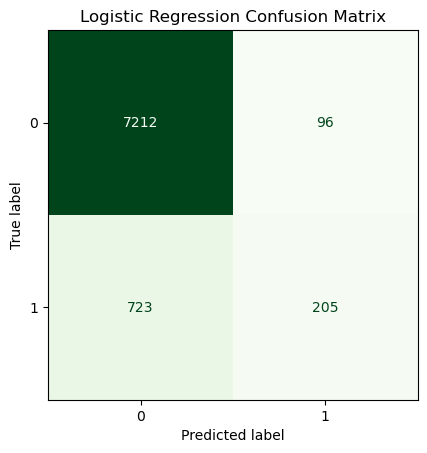

In [62]:
lr_cm = confusion_matrix(y_test, lr_test_preds)
lr_cm_disp = ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = lr.classes_)
lr_cm_disp.plot(cmap = 'Greens', colorbar = False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

- Accuracy: (TP + TN) / (TP + FP + FN +TN)
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1: 2*(Precision*Recall) / (Precision + Recall)

A true positive in this context is that we predicted the contact will subscribe a deposit and they do.  
A false positive is if we predicted the contact will subscribe a deposit, but they don't.  
A false negative is if we predicted the contact won't subscribe a deposit, but they actually do.  
And a false negative is if we predicted the contact won't subscribe a deposit and they don't.  

Accuracy is not as meaningful for our problem since the data is very imbalanced (11% success rate), so precision, recall, and F1 scores are what we really want to look at. In this problem's context, I think a false negative is more detrimental than a false positive because if we predict the contact will subscribe a deposit but they don't, it's not as bad as if we predict the contact won't subscribe a deposit but they actually do.

Predicting that the contact won't subscribe a deposit will probably result in the bank not including that contact in their next marketing campaign. The cost to the bank for missing out on these contacts that actually will subscribe a deposit is much higher than if they spent a bit more money on their campaign with contacts who they thought would subscribe, but actually won't. A mathematical way to evaluate this would be to model out the cost per contact for the campaign vs the estimated customer lifetime value (CLV) for each deposit they receive.

So I think recall will be the most important performance metric for us to evalute since we want to try to correctly identify as many positives as possible and minimize false negatives. The only issue is our dataset is very imbalanced which isn't great for recall, so we will also want to pay attention to the f1 score for a blend of precision and recall.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [64]:
models = {
    'Logistic Regression': LogisticRegression(random_state = 4),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 4),
    'SVM': SVC(random_state = 4)
}

In [65]:
results = []

for model_name, model in models.items():

    start = time.time()
    model.fit(X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    model_train_preds = model.predict(X_train_processed_df)
    model_test_preds = model.predict(X_test_processed_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train, model_train_preds)
    model_train_precision = metrics.precision_score(y_train, model_train_preds)
    model_train_recall = metrics.recall_score(y_train, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train, model_train_preds)
    
    model_test_accuracy = metrics.accuracy_score(y_test, model_test_preds)
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)
    
    results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Train Precision': model_train_precision,
        'Train Recall': model_train_recall,
        'Train F1': model_train_f1,
        'Test Accuracy': model_test_accuracy,
        'Test Precision': model_test_precision,
        'Test Recall': model_test_recall,
        'Test F1': model_test_f1
    })

  File "C:\Users\tbambanian\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\tbambanian\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tbambanian\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\tbambanian\AppData\Local\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [66]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,0.4995,0.900182,0.661081,0.233899,0.345541,0.900559,0.681063,0.220905,0.333605
1,KNN,0.0117,0.914572,0.718036,0.398006,0.512136,0.890238,0.523438,0.288793,0.372222
2,Decision Tree,0.5979,0.995416,0.999439,0.959849,0.979244,0.837057,0.299807,0.334052,0.316004
3,SVM,323.9615,0.904706,0.698887,0.270816,0.390367,0.902258,0.682493,0.247845,0.363636


Training Time:
- KNN, Logistic Regression, and Decision Tree were all very fast
- SVM took a long time (over 5 minutes), but let's keep in mind this was with default settings it used the RBF kernel

Performance:
- Decision Tree had very high scores on the training data, but it's overfitting since the scores on test data were much lower
- The next best model was KNN, but it also seems to be overfitting slightly as its precision, recall, and f1 test scores dropped quite a bit from its training scores
- Logistic Regression and SVM both seemed to perform similarly and generalized well on the test data. However the accuracy score wasn't that much better than our baseline model, and the precision, recall, and f1 scores weren't very impressive, so we'll definitely want to do some hyperparameter tuning and potentially some additional feature engineering.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [67]:
from sklearn.model_selection import GridSearchCV

The SVM model was taking far too long to train, so I commented the code to not run it. But I'm leaving the code there to illustrate how I would include it in the hyperparameter tuning and grid search if training time wasn't a concern.

In [68]:
hyper_models = {
    'Logistic Regression': LogisticRegression(random_state = 4),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 4)
    # 'SVM': SVC(random_state = 4)
}

In [69]:
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 1000]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    # 'SVM': {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf', 'sigmoid']
    # }
}

In [70]:
results = []

for hyper_model_name, hyper_model in hyper_models.items():

    grid_search = GridSearchCV(hyper_model, param_grid = param_grid[hyper_model_name], cv = 5, n_jobs = -1)
    start = time.time()
    grid_search.fit(X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    grid_search_train_preds = grid_search.predict(X_train_processed_df)
    grid_search_test_preds = grid_search.predict(X_test_processed_df)
    
    grid_search_train_accuracy = metrics.accuracy_score(y_train, grid_search_train_preds)
    grid_search_train_precision = metrics.precision_score(y_train, grid_search_train_preds)
    grid_search_train_recall = metrics.recall_score(y_train, grid_search_train_preds)
    grid_search_train_f1 = metrics.f1_score(y_train, grid_search_train_preds)
    
    grid_search_test_accuracy = metrics.accuracy_score(y_test, grid_search_test_preds)
    grid_search_test_precision = metrics.precision_score(y_test, grid_search_test_preds)
    grid_search_test_recall = metrics.recall_score(y_test, grid_search_test_preds)
    grid_search_test_f1 = metrics.f1_score(y_test, grid_search_test_preds)
    
    results.append({
        'grid_search': hyper_model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': grid_search_train_accuracy,
        'Train Precision': grid_search_train_precision,
        'Train Recall': grid_search_train_recall,
        'Train F1': grid_search_train_f1,
        'Test Accuracy': grid_search_test_accuracy,
        'Test Precision': grid_search_test_precision,
        'Test Recall': grid_search_test_recall,
        'Test F1': grid_search_test_f1
    })

In [71]:
results_df = pd.DataFrame(results)
results_df

,grid_search,Train Time,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,8.6985,0.900121,0.666140,0.227432,0.339092,0.900559,0.686007,0.216595,0.329238
1,KNN,141.8358,0.906345,0.670665,0.331447,0.443643,0.893881,0.561644,0.265086,0.360176
2,Decision Tree,4.2394,0.903036,0.678645,0.264619,0.380768,0.900194,0.650568,0.246767,0.357812


In [72]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=4)

In [73]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2}

#### Let's also try reducing the number of features to see if that helps the models perform better

For numerical features, we will select 'previous' and 'nr.employed'.
'pdays' was our best numerical feature (in terms of correlation), but the distribution of that feature was very imbalanced with most of the values being 999 which meant that the client was not previously contacted. And even if I converted the 999 values to missing values, this would mean 96% of the feature would be missing values and I don't have a good way to impute it, so I think we're better off dropping it.

In [74]:
df['pdays'].value_counts(normalize = True).round(2)

pdays
999    0.96
3      0.01
6      0.01
4      0.00
9      0.00
2      0.00
7      0.00
12     0.00
10     0.00
5      0.00
13     0.00
11     0.00
1      0.00
15     0.00
14     0.00
8      0.00
0      0.00
16     0.00
17     0.00
18     0.00
22     0.00
19     0.00
21     0.00
25     0.00
26     0.00
27     0.00
20     0.00
Name: proportion, dtype: float64

There were other good numerical features like 'euribor3m' and 'emp.var.rate' but there seemed to be multicollinearity between these features and 'nr.employed', so we will only use 'nr.employed' since it had the highest correlation with the target variable out of the three.

For categorical features, we will use 'job', 'contact', 'month', and 'poutcome' as the categories in these features did noticeably seem to have different success rates during our earlier exploratory data analysis.

In [75]:
reduced_X_train = X_train[['job','contact','month', 'previous', 'poutcome','nr.employed']]
reduced_X_test = X_test[['job','contact','month', 'previous', 'poutcome','nr.employed']]

In [76]:
num_cols = reduced_X_train.select_dtypes(['int64', 'float']).columns.tolist()
cat_cols = reduced_X_train.select_dtypes(['object']).columns.tolist()

In [77]:
reduced_preprocessor = ColumnTransformer(transformers = [
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop = 'first', sparse_output = False), cat_cols)
])

In [78]:
reduced_X_train_processed = reduced_preprocessor.fit_transform(reduced_X_train)
reduced_X_test_processed = reduced_preprocessor.transform(reduced_X_test)

In [79]:
cat_cols_columns = reduced_preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

In [80]:
reduced_X_train_processed_df = pd.DataFrame(reduced_X_train_processed, columns = list(num_cols) + list(cat_cols_columns))
reduced_X_test_processed_df = pd.DataFrame(reduced_X_test_processed, columns = list(num_cols) + list(cat_cols_columns))

In [81]:
reduced_models = {
    'Logistic Regression': LogisticRegression(random_state = 4),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 4),
    'SVM': SVC(random_state = 4)
}

In [82]:
reduced_param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 1000]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

In [83]:
results = []

for reduced_model_name, reduced_model in reduced_models.items():

    grid_search = GridSearchCV(reduced_model, param_grid = reduced_param_grid[reduced_model_name], cv = 5, n_jobs = -1)
    start = time.time()
    grid_search.fit(reduced_X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    grid_search_train_preds = grid_search.predict(reduced_X_train_processed_df)
    grid_search_test_preds = grid_search.predict(reduced_X_test_processed_df)
    
    grid_search_train_accuracy = metrics.accuracy_score(y_train, grid_search_train_preds)
    grid_search_train_precision = metrics.precision_score(y_train, grid_search_train_preds)
    grid_search_train_recall = metrics.recall_score(y_train, grid_search_train_preds)
    grid_search_train_f1 = metrics.f1_score(y_train, grid_search_train_preds)
    
    grid_search_test_accuracy = metrics.accuracy_score(y_test, grid_search_test_preds)
    grid_search_test_precision = metrics.precision_score(y_test, grid_search_test_preds)
    grid_search_test_recall = metrics.recall_score(y_test, grid_search_test_preds)
    grid_search_test_f1 = metrics.f1_score(y_test, grid_search_test_preds)
    
    results.append({
        'grid_search': reduced_model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': grid_search_train_accuracy,
        'Train Precision': grid_search_train_precision,
        'Train Recall': grid_search_train_recall,
        'Train F1': grid_search_train_f1,
        'Test Accuracy': grid_search_test_accuracy,
        'Test Precision': grid_search_test_precision,
        'Test Recall': grid_search_test_recall,
        'Test F1': grid_search_test_f1
    })

In [84]:
results_df = pd.DataFrame(results)
results_df

,grid_search,Train Time,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,2.3813,0.898725,0.654321,0.214228,0.322777,0.901894,0.704082,0.223060,0.338789
1,KNN,87.3362,0.903582,0.648364,0.315009,0.424012,0.895459,0.572043,0.286638,0.381910
2,Decision Tree,1.4815,0.901366,0.656929,0.260577,0.373143,0.902744,0.684058,0.254310,0.370778
3,SVM,637.3557,0.901791,0.662791,0.261116,0.374638,0.902380,0.685629,0.246767,0.362916


So overall even with some hyperparameter tuning and feature selection, none of the models really performed that much better than our simple logistic regression model with default parameters. All 4 classification models performed fairly similarly, so I wouldn't necessarily say there was a best model. From a practical standpoint, I would probably not recommend the SVM model since the training time was much longer and it didn't make up for it with better performance than the other models. 

#### Next Steps and Recommendations

In terms of next steps, I think the best thing to do would be to go back and do some resampling to balance out the classes as this dataset had a significant class imbalance. I would also recommend trying out some better feature selection techniques like PCA (Principal Component Analysis) or RFE (Recursive Feature Elimination). This may be enough to help improve the model's performance.   

My recommendations to the bank for their next marketing campaign would be to do it in the month of March and prioritize cellular phone types over telephone types. They should also keep an eye on economic metrics like the CPI (consumer price index) and employment variation rate as we saw with the logistic regression coefficients that the log odds of the outcome (contact subscribing a deposit) increased with the CPI and decreased with the employment variation rate.